In [1]:
import geemap
import ee

In [2]:
ee.Initialize()

In [3]:
Map = geemap.Map()

In [4]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

# En esta sección aprenderemos a manejar imágenes de tipo vectorial

1. Imagenes vectoriales con límites (hasta el segundo nivel) político-administrativos de los países del mundo (<a href="https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2?hl=en">Link</a>).

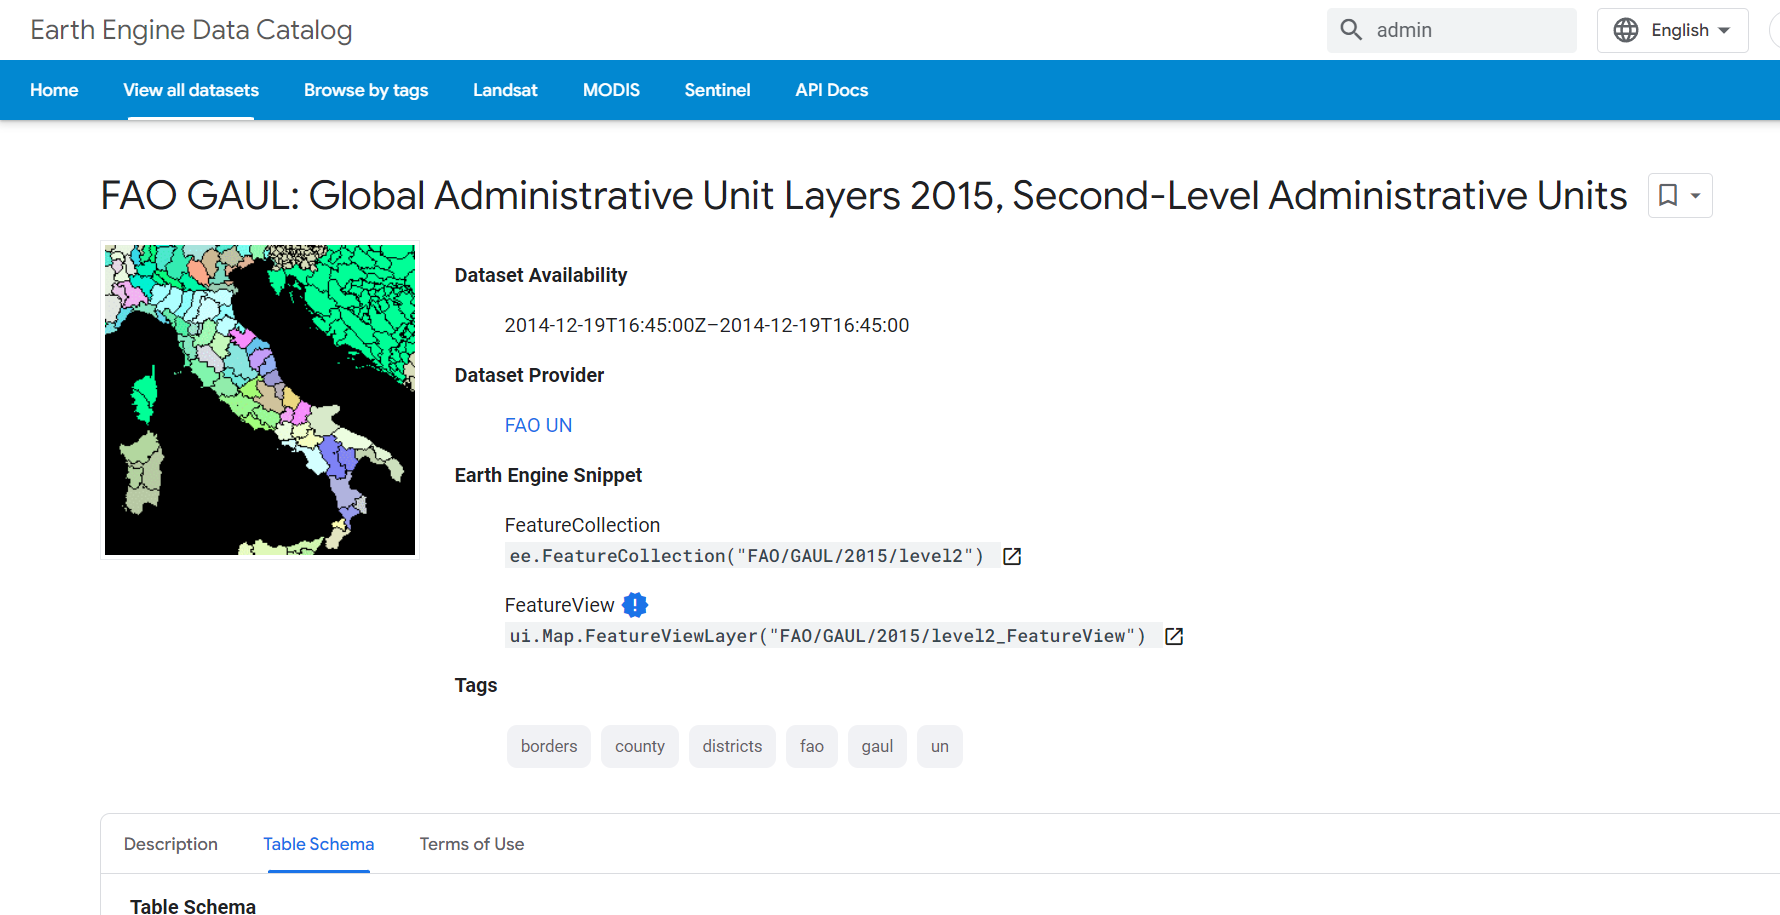

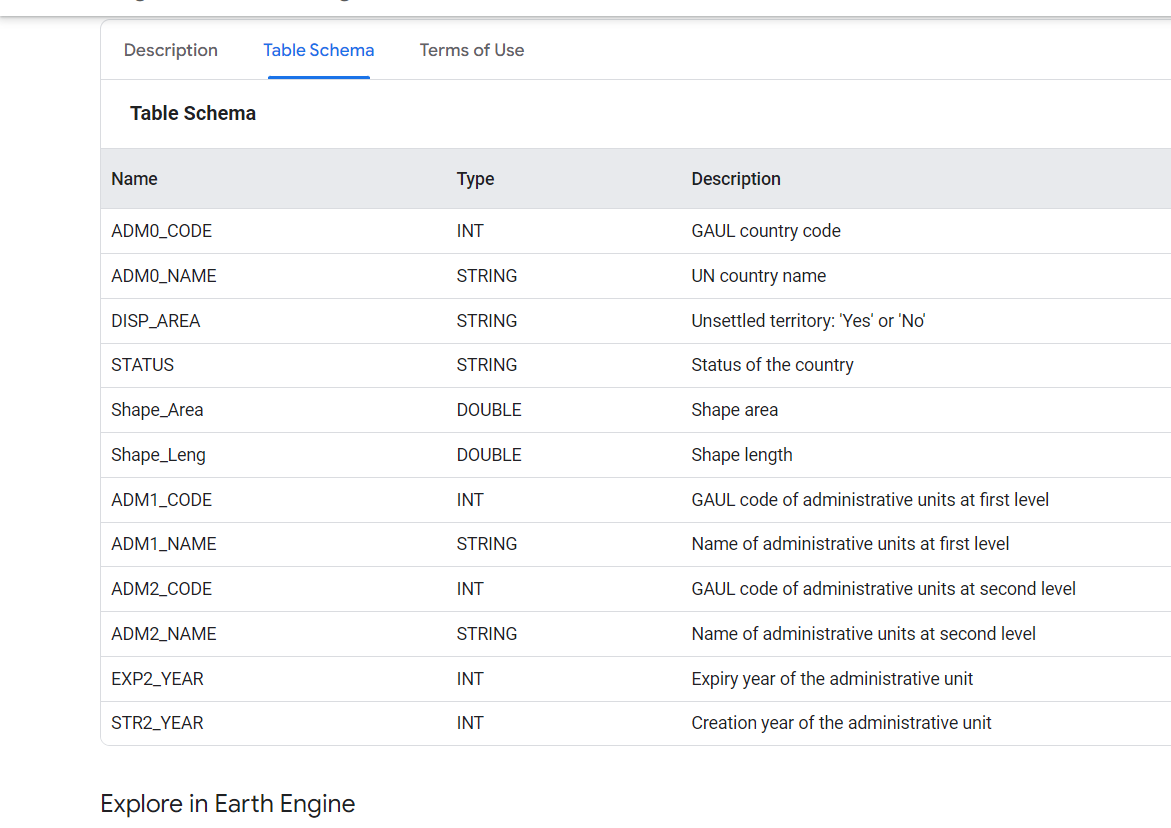

### Primero haremos un filtro por país (nivel 0 del catalogo de geometrías o vectores que importaremos)

In [5]:
# Importar catalogo, está función y el nombre que recibe el catalogo lo puede observar en el link compartido (https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2?hl=en)

AreaAdm = ee.FeatureCollection("FAO/GAUL/2015/level2")

In [6]:
# Filtraremos la geometría del territorio Colombiano
# Observemos que en el link (https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2?hl=en)
# del catálogo hay una pestaña llamada "Table Schema", esta pestaña nos permite visualizar el nombre de los atributos que
# tiene este catálogo.

# En este caso nos interesa, la propiedad "ADM0_NAME" que contiene las geometrías de los países

Colombia = AreaAdm.filter(ee.Filter.eq("ADM0_NAME", "Colombia"))

# La función filter nos permite filtrar metadatos y propiedades de vectores e imagenes
# ee.Filter.eq() nos permite filtar una de las geometrías del atributo ADM0_NAME, en este caso busca la geometría llamada Colombia

In [7]:
# Ahora vamos a visualizar está geometria como una capa de nuestro mapa visor
# Para ello empleamos la función addLayer()

Map.addLayer(Colombia,{"color":"blue"}, "Colombia")

In [8]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [9]:
# Observemos las propiedades de esta geometría que acabamos de importar

Colombia.getInfo()

{'type': 'FeatureCollection',
 'columns': {'ADM0_CODE': 'Integer',
  'ADM0_NAME': 'String',
  'ADM1_CODE': 'Integer',
  'ADM1_NAME': 'String',
  'ADM2_CODE': 'Integer',
  'ADM2_NAME': 'String',
  'DISP_AREA': 'String',
  'EXP2_YEAR': 'Integer',
  'STATUS': 'String',
  'STR2_YEAR': 'Integer',
  'Shape_Area': 'Float',
  'Shape_Leng': 'Float',
  'system:index': 'String'},
 'version': 1655147597835215,
 'id': 'FAO/GAUL/2015/level2',
 'properties': {'system:asset_size': 316282971},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-75.57530161440151, 5.7177001803919865],
      [-75.56659745611081, 5.713602210618511],
      [-75.56320407135007, 5.707800992363463],
      [-75.5619957016373, 5.700300764803507],
      [-75.55909727963747, 5.691699132209574],
      [-75.55100399638977, 5.686999250231794],
      [-75.54299991335186, 5.681799922075023],
      [-75.53720306877455, 5.673100271963319],
      [-75.52570306266671, 5.6712987381200906],
      [-75

In [10]:
# Apartir de la geometría de Colombia, vamos a sacar la geometría de uno de sus departamentos (nivel 1)

Cauca = Colombia.filter(ee.Filter.eq("ADM1_NAME","Cauca"))

In [11]:
Map.addLayer(Cauca, {"color": "green"}, "Departamento del Cauca")

In [12]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [13]:
Cauca.getInfo()

{'type': 'FeatureCollection',
 'columns': {'ADM0_CODE': 'Integer',
  'ADM0_NAME': 'String',
  'ADM1_CODE': 'Integer',
  'ADM1_NAME': 'String',
  'ADM2_CODE': 'Integer',
  'ADM2_NAME': 'String',
  'DISP_AREA': 'String',
  'EXP2_YEAR': 'Integer',
  'STATUS': 'String',
  'STR2_YEAR': 'Integer',
  'Shape_Area': 'Float',
  'Shape_Leng': 'Float',
  'system:index': 'String'},
 'version': 1655147597835215,
 'id': 'FAO/GAUL/2015/level2',
 'properties': {'system:asset_size': 316282971},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-76.98660260016186, 1.9298008380593783],
      [-76.98139883939542, 1.9223006326040135],
      [-76.96579650784825, 1.903099774867195],
      [-76.95020299415549, 1.8885987578537544],
      [-76.93869855637577, 1.864301080023586],
      [-76.93689707652004, 1.8441013568791396],
      [-76.93689707652004, 1.826800069519819],
      [-76.92999882279281, 1.8134985954525258],
      [-76.92479502419827, 1.801298459536836],
      

In [14]:
# Por último, a partir de la geometría del Cauca, vamos a extraer la geometría de uno de sus municipios (Nivel 2)

StderQ = Cauca.filter(ee.Filter.eq("ADM2_NAME", "Santander De Quilichao"))

In [15]:
Map.addLayer(StderQ, {"color":"red"}, "Santander de Q.")

In [16]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

2. Importar imagenes vectoriales a partir de un archivo shape (.shp).

Para importar un archivo shape a python con la librería geemap primero debemos adaptarlo al formato de GEE

In [17]:
shpImportado = geemap.shp_to_ee("shape/AltoPatia.shp") #Vamos a emplear la función shp_to_ee

In [18]:
Map.addLayer(shpImportado, {"color":"orange"}, "Shape importado")

In [19]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…